### California Housing Prices Data Modeling

* [importing the libraries](#importing-the-libraries)
* [Reading the data](#Reading-the-data)
* [Exploring the data](#Exploring-the-data)
* [Visualizing the data](#Visualizing-the-data)
* [Drop duplicates values](#Drop-duplicates-values)
* [Missing data](#Missing-data)
* [Filling in missing values](#Filling-in-missing-values)
* [Outlier and Deleting Observations](#Outlier-and-Deleting-Observations)
* [Encoding categorical features](#Encoding-categorical-features)
* [Drop unimportant columns](#Drop-unimportant-columns)
* [Scaling and Split the data](#Scaling-and-Split-the-data)
* [Linear Regression](#Linear-Regression)
* [Ridg regression](#Ridg-regression)
* [Lasso Regression](#Lasso-Regression)
* [compersion between models](#compersion-between-models)

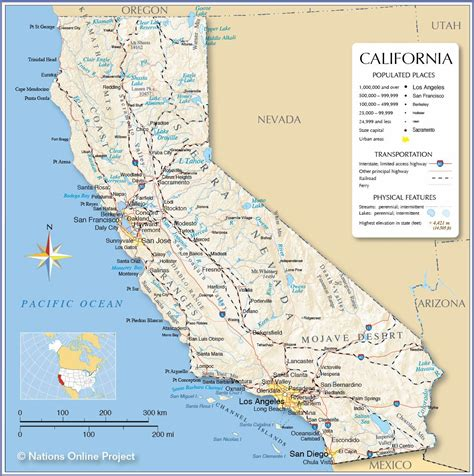

## importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error
%matplotlib inline 

## Reading the data

In [2]:
df = pd.read_csv("../input/california-housing-prices/housing.csv")

## Exploring the data

In [3]:
pd.set_option("display.max.columns", None)
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8386,-118.36,33.98,46.0,1425.0,283.0,782.0,273.0,5.0570,246300.0,<1H OCEAN
19698,-121.62,39.11,11.0,3519.0,577.0,1459.0,549.0,4.2792,123800.0,INLAND
18432,-121.85,37.26,16.0,2312.0,303.0,1158.0,295.0,7.4323,311800.0,<1H OCEAN
17071,-122.25,37.52,14.0,1472.0,291.0,876.0,292.0,4.3594,366000.0,NEAR BAY
1778,-122.35,37.94,34.0,1880.0,459.0,1358.0,422.0,1.6571,105200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizing the data

Text(0.5, 1.0, 'House Prices')

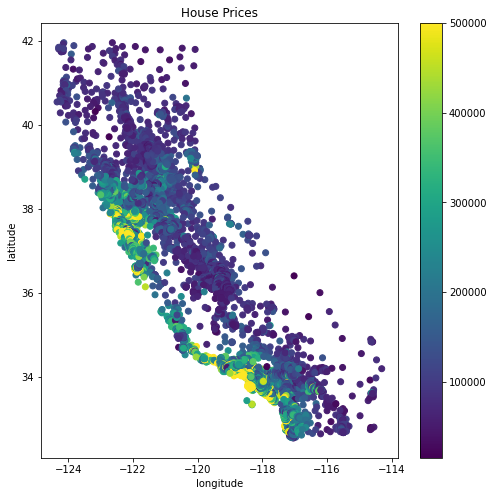

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(df['longitude'] , df['latitude'] , c = df['median_house_value'])
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("House Prices")

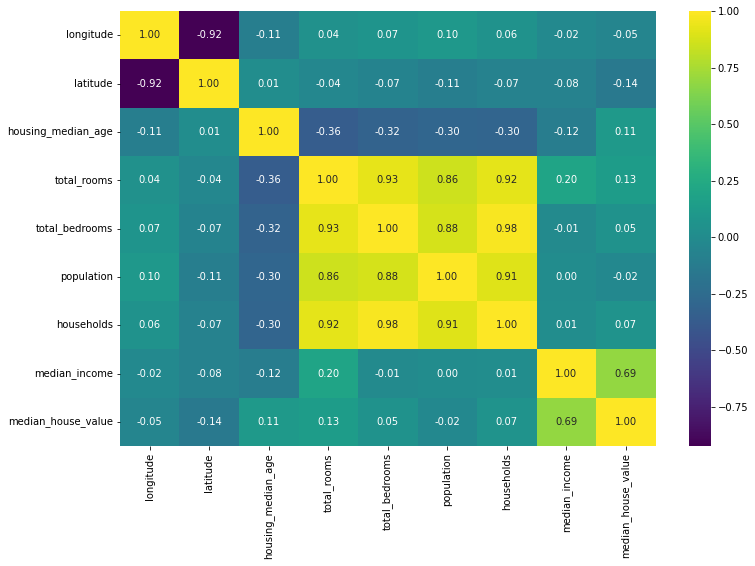

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='viridis')

plt.show()

> **Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.**

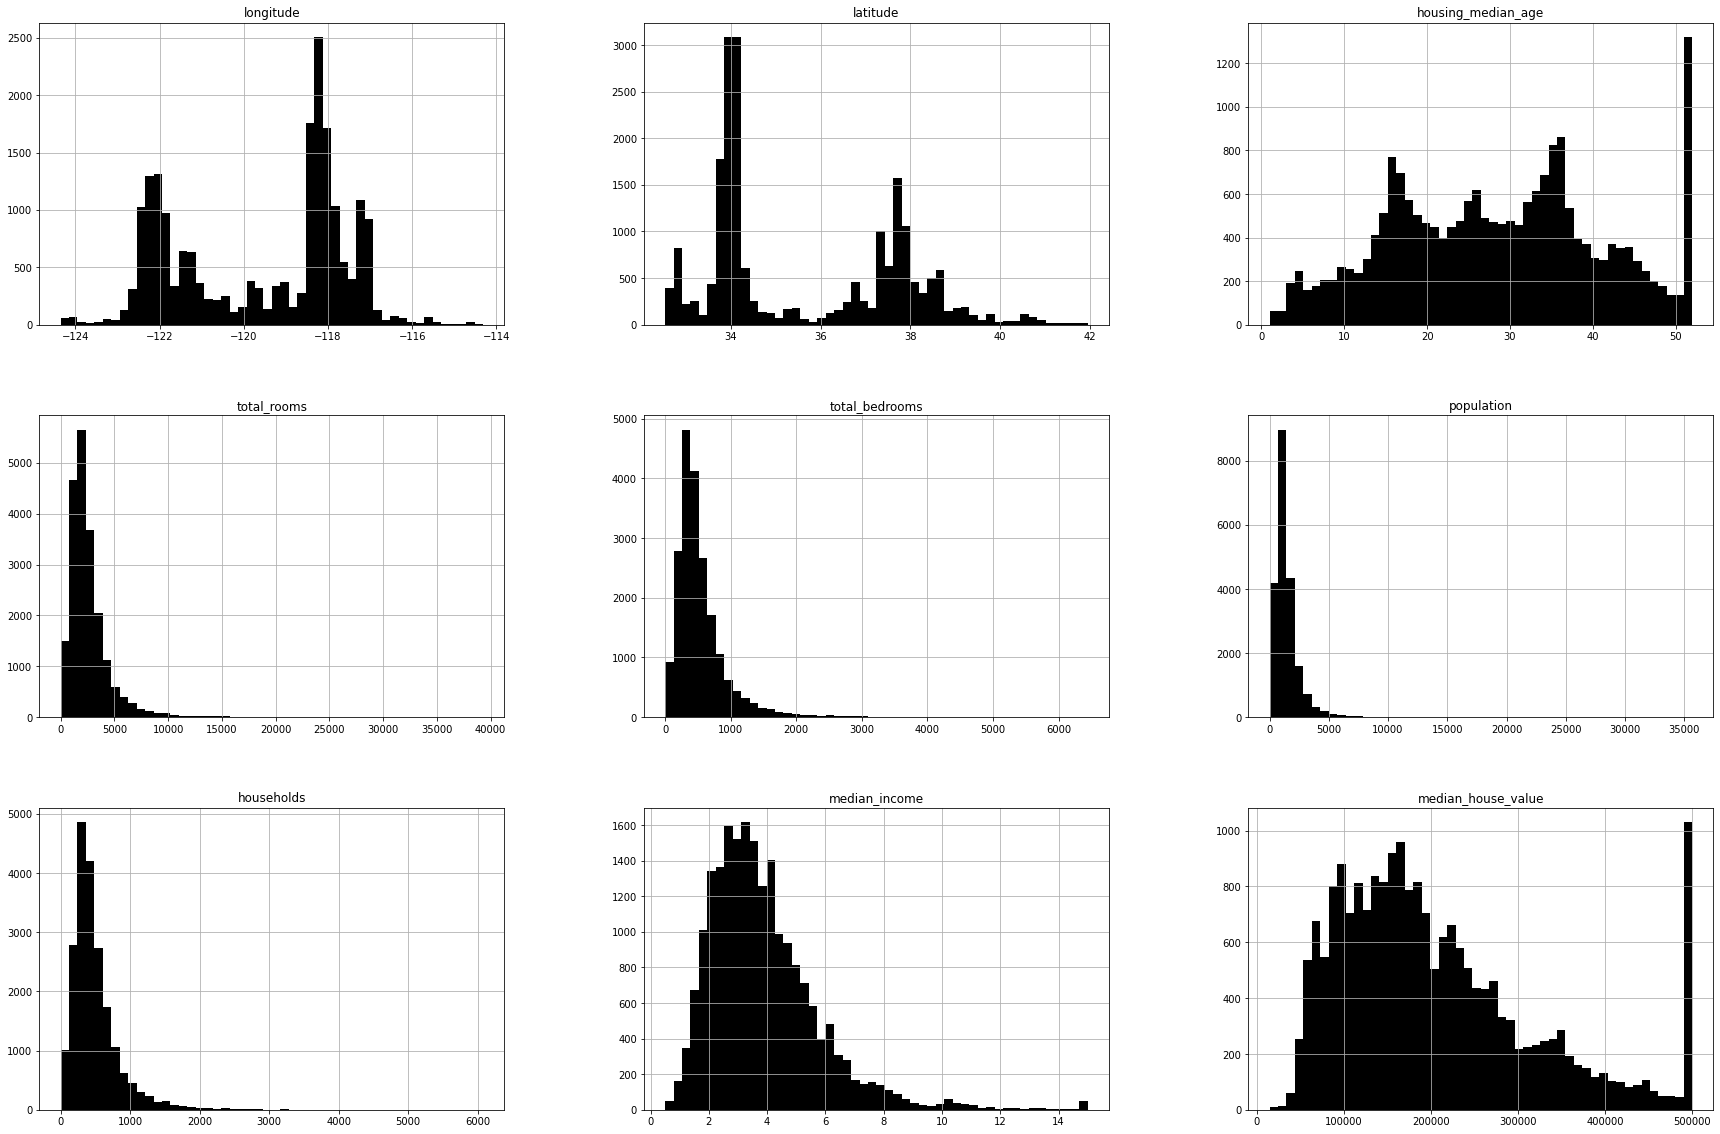

In [8]:
df.hist(bins = 50 , figsize=(30 , 20),color="k")
plt.show()

> ****plot histogram to observe the data Distribution****  

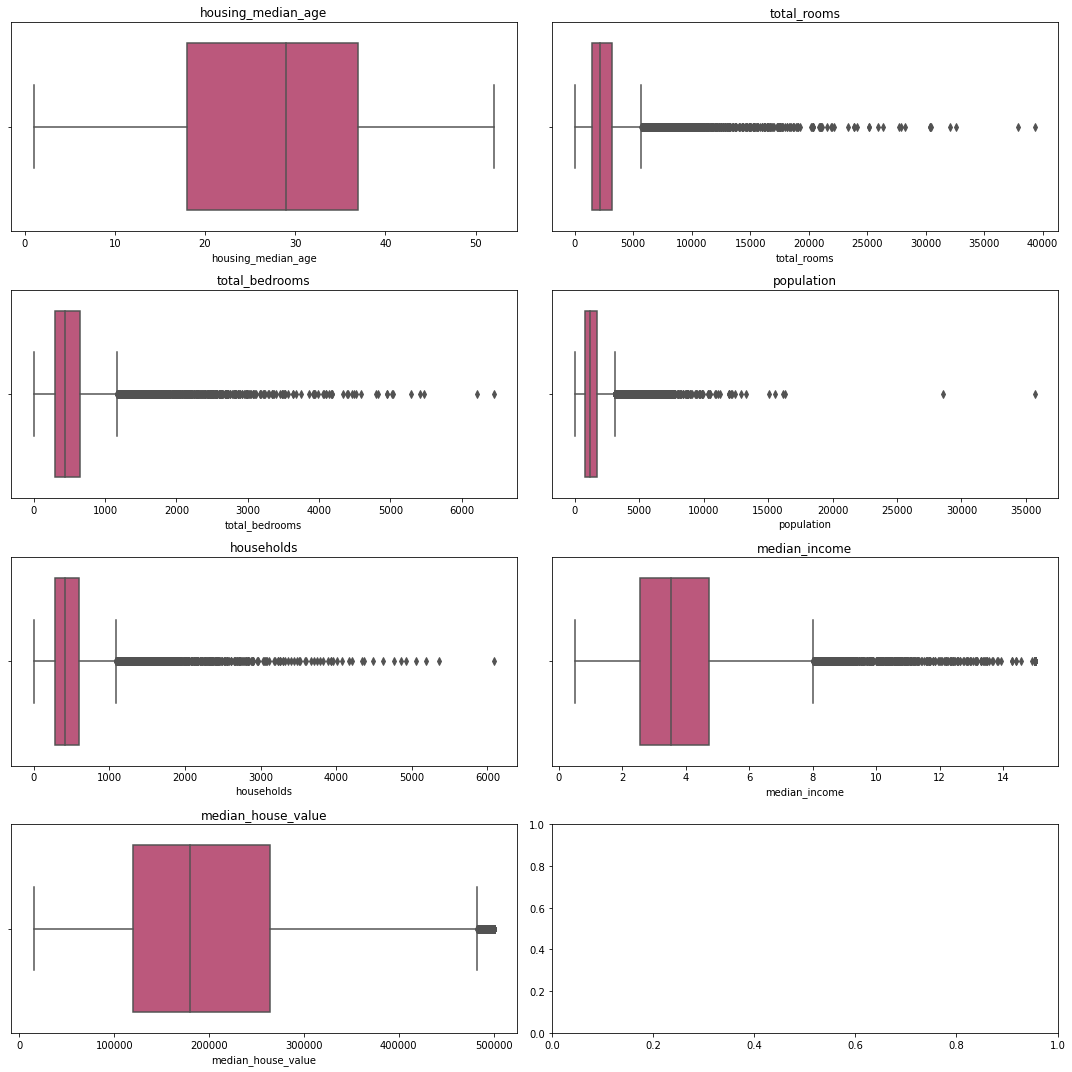

In [9]:
num_columns = list(df.select_dtypes(include=["int64","float64"]).columns)[2:]

fig, ax = plt.subplots(4,2, figsize = (15,15))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)

for i in num_columns:
    sns.boxplot(data=df,x=i,ax=ax[num_columns.index(i)],palette="plasma").set_title(i)

ax = np.reshape(ax, (4, 2))
plt.tight_layout()
plt.show()

> ****plot boxplot to observe the data Distribution and outliers****

## Drop duplicates values

In [10]:
print("Data shape Before duplicates Values: ",df.shape)
df_new=df.drop_duplicates()
print("Data shape After duplicates Values: ",df_new.shape)

Data shape Before duplicates Values:  (20640, 10)
Data shape After duplicates Values:  (20640, 10)


> **We note that there are no duplicates Values**

## Missing data

### See how many missing data points we have

In [11]:
missing_values_df = df.isnull().sum()
print(missing_values_df)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


> **total_bedrooms is the only Column to have missing values in our dataset**

In [12]:
#Percentage of missing data by feature

df_na = (missing_values_df / len(df)) * 100

# drop columns without missing values 
df_na = df_na.drop(df_na[df_na == 0].index)

#sort
df_na=df_na.sort_values(ascending=False)

print("Percentage of missing values in {} : {} %".format(df_na.index[0],df_na[0]))

total_cells = np.product(df.shape)

total_missing = missing_values_df.sum()

print("percent of data that is missing from all Dataset: {}%".format(round((total_missing/total_cells) * 100,ndigits=2)))

Percentage of missing values in total_bedrooms : 1.002906976744186 %
percent of data that is missing from all Dataset: 0.1%


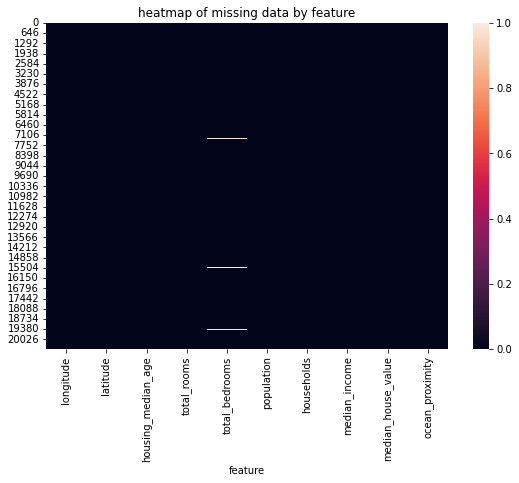

In [13]:
# create plot
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.isnull())
ax.set(title='heatmap of missing data by feature', xlabel='feature')
plt.show()

## Filling in missing values

In [14]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7485,-118.21,33.92,37.0,1705.0,403.0,1839.0,410.0,2.5833,132700.0,<1H OCEAN
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY
8432,-118.37,33.93,10.0,199.0,41.0,61.0,56.0,2.8958,245800.0,<1H OCEAN
3336,-122.50,38.82,12.0,2394.0,443.0,877.0,341.0,2.5625,109200.0,INLAND
12058,-117.59,33.88,13.0,3239.0,849.0,2751.0,813.0,2.6111,107000.0,INLAND


In [15]:
def Zscore_outlier(column,df,scale=3.75):
    out=[]
    m = np.mean(df[column])
    sd = np.std(df[column])
    for i in df[column]: 
        z = (i-m)/sd
        if np.abs(z) > scale: 
            out.append(i)
    df=df[df[column].isin(out) == False]
    return df

bedrooms to total ratio mean :  0.21303883048085132
bedrooms to total ratio mean :  0.210720927358447


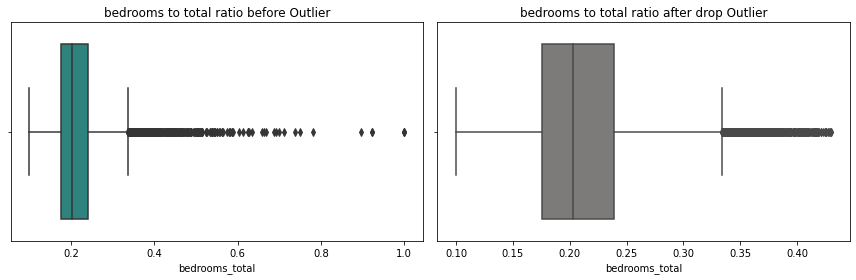

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
font_dict = {'fontsize': 14}
ax = np.ravel(ax)

bedrooms_total=pd.DataFrame(df_new['total_bedrooms']/df_new['total_rooms'],columns=["bedrooms_total"])

print("bedrooms to total ratio mean : ",bedrooms_total.mean()[0])

sns.boxplot(data=bedrooms_total,x='bedrooms_total',palette='viridis', ax=ax[0]).set_title('bedrooms to total ratio before Outlier')

bedrooms_total=Zscore_outlier(column='bedrooms_total',df=bedrooms_total)

print("bedrooms to total ratio mean : ",bedrooms_total.mean()[0])

sns.boxplot(data=bedrooms_total,x='bedrooms_total',palette='cividis', ax=ax[1]).set_title('bedrooms to total ratio after drop Outlier')


ax = np.reshape(ax, (1, 2))
plt.tight_layout()
plt.show()
bedrooms_total=bedrooms_total.mean()[0]


In [17]:
df_new['total_bedrooms']=df_new['total_bedrooms'].fillna(bedrooms_total*df_new['total_rooms'])

In [18]:
df_new.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Plot the Distribution of total_bedrooms before and after Filling in missing values

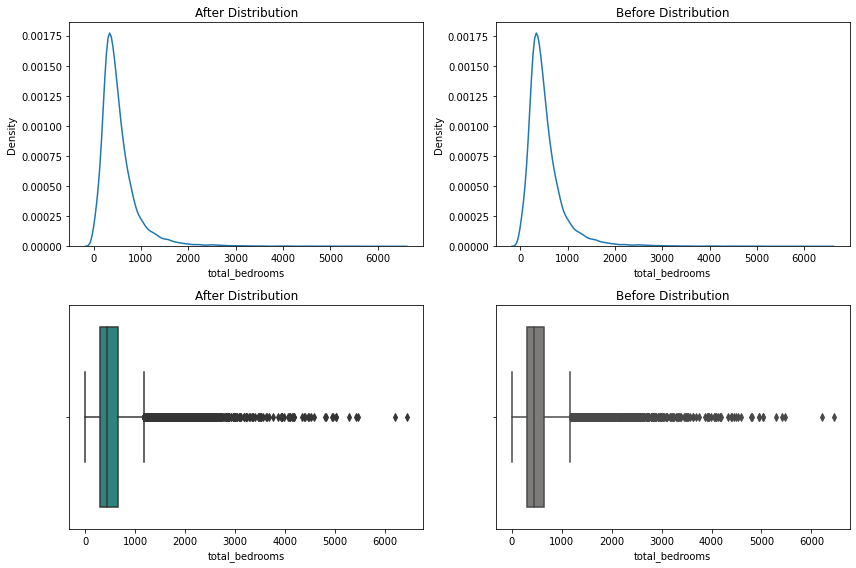

In [19]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
font_dict = {'fontsize': 14}

ax = np.ravel(ax)
sns.kdeplot(data=df_new,x='total_bedrooms',ax = ax[0],palette='viridis').set_title('After Distribution')
sns.kdeplot(data=df,x='total_bedrooms',ax = ax[1],palette='cividis').set_title('Before Distribution')
sns.boxplot(data=df_new,x='total_bedrooms', ax=ax[2],palette='viridis').set_title('After Distribution')
sns.boxplot(data=df,x='total_bedrooms', ax=ax[3],palette='cividis').set_title('Before Distribution')

ax = np.reshape(ax, (2, 2))
plt.tight_layout()

## Outlier and Deleting  Observations

In [20]:
data=df_new.copy()
df_new.shape

(20640, 10)

In [21]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
        sns.scatterplot(data=data,x=columne ,ax = ax[2], y=data['median_house_value'],color='r').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        sns.scatterplot(data=data,x=columne ,ax = ax[2], y=data['median_house_value'],color='#2171b5').set_title(title[i])
    
    ax = np.reshape(ax, (1, 3))
    plt.tight_layout()

### 1. total_bedrooms

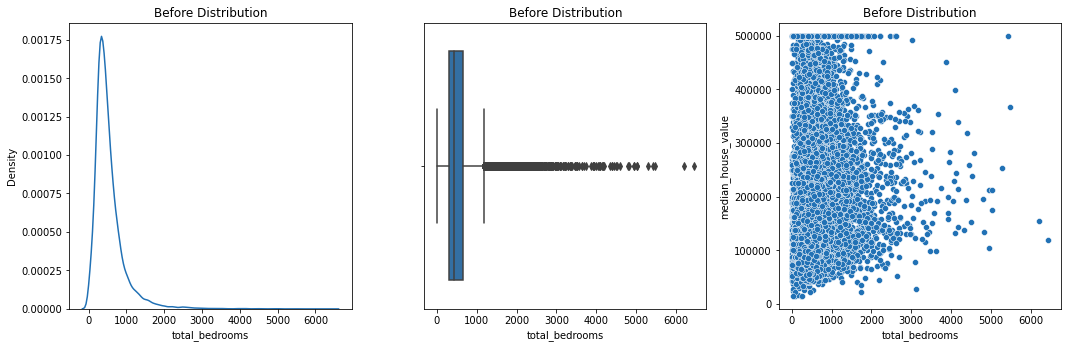

In [22]:
Distribution2(columne='total_bedrooms',data=data,i=0)

In [23]:
data[data['total_bedrooms']>=3000].shape

(67, 10)

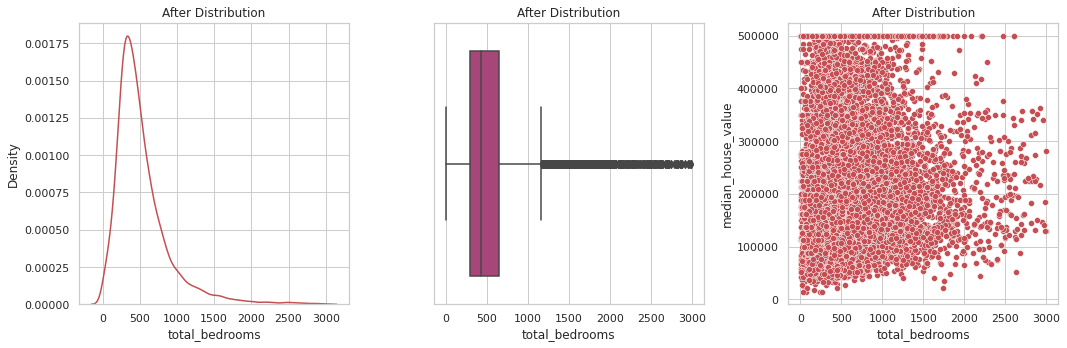

In [24]:
data=data[data['total_bedrooms']<3000]
Distribution2(columne='total_bedrooms',data=data,i=1)

### 2. total_rooms

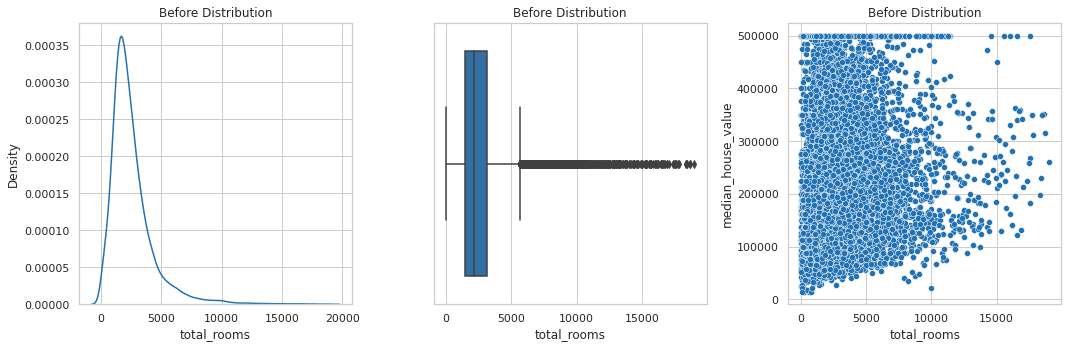

In [25]:
Distribution2(columne='total_rooms',data=data,i=0)

In [26]:
data[data['total_rooms']>=15000].shape

(44, 10)

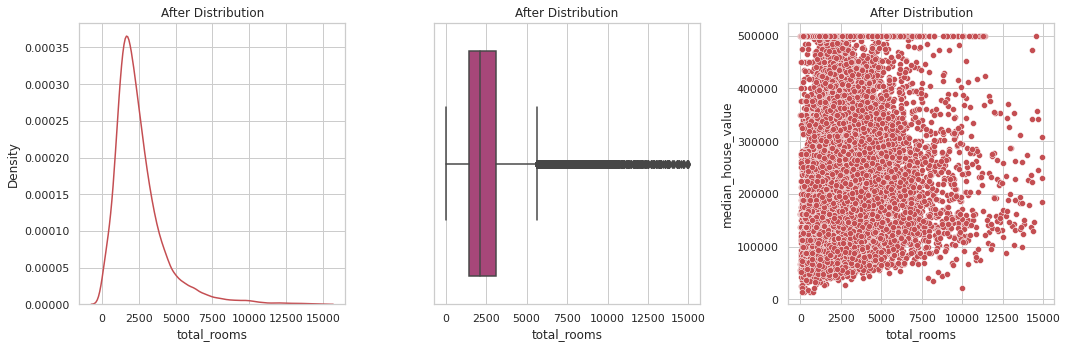

In [27]:
data=data[data['total_rooms']<15000]
Distribution2(columne='total_rooms',data=data,i=1)

### 3. housing_median_age

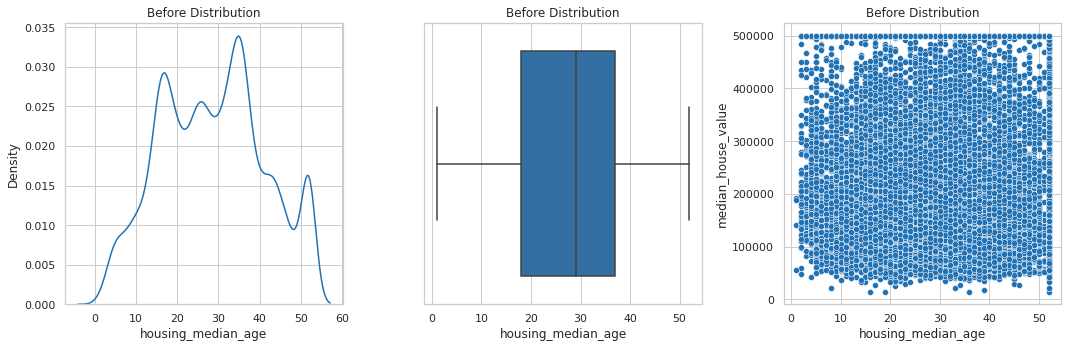

In [28]:
Distribution2(columne='housing_median_age',data=data,i=0)

> **no Outliers**

### 4. population

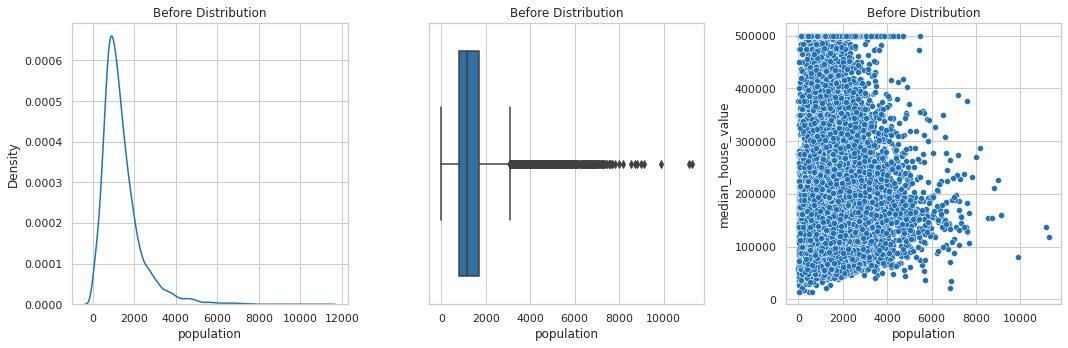

In [29]:
Distribution2(columne='population',data=data,i=0)

In [30]:
data[data['population']>=6500].shape

(64, 10)

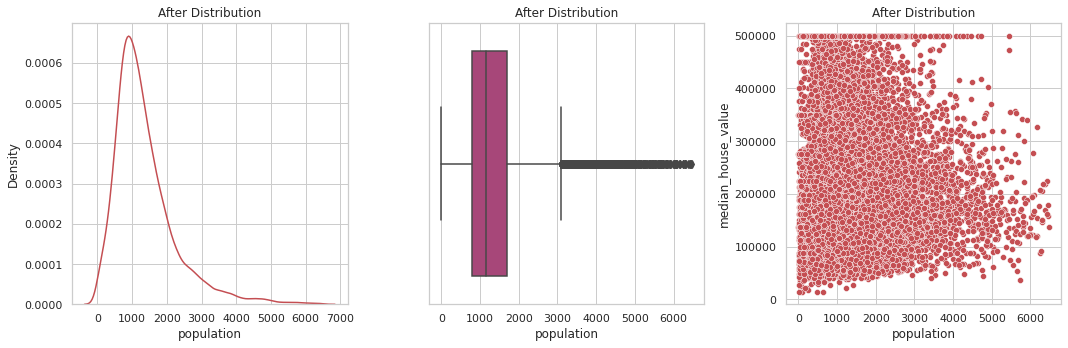

In [31]:
data=data[data['population']< 6500]
Distribution2(columne='population',data=data,i=1)

### 5. households

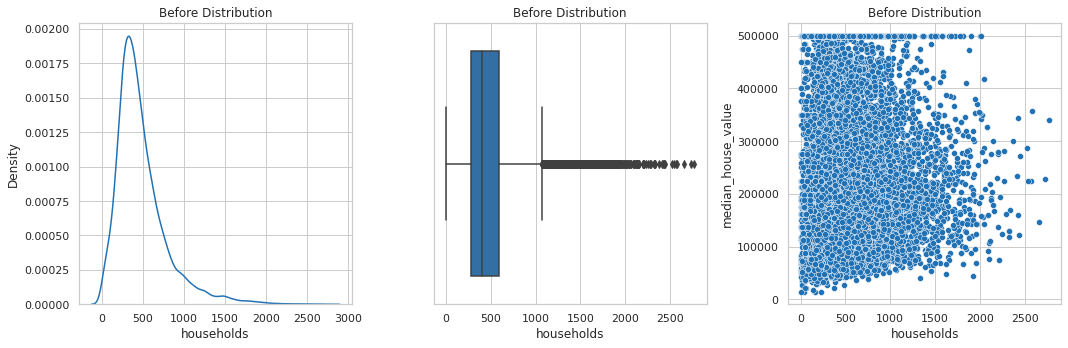

In [32]:
Distribution2(columne='households',data=data,i=0)

In [33]:
data[data['households']>=2000].shape

(54, 10)

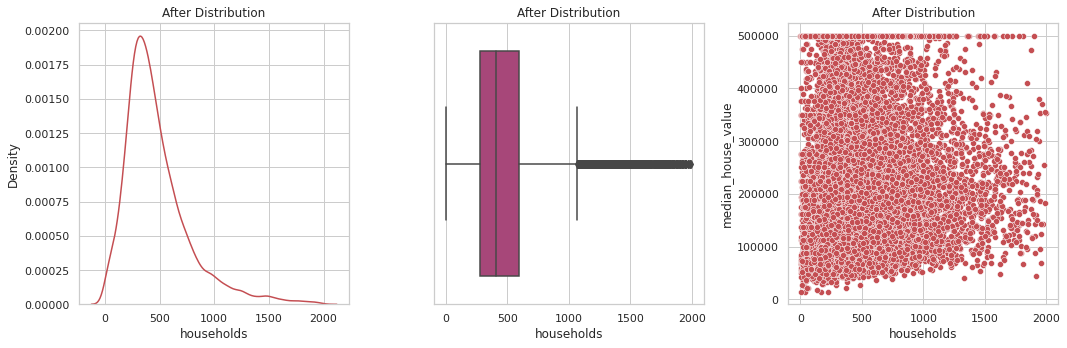

In [34]:
data=data[data['households']<2000]
Distribution2(columne='households',data=data,i=1)

### 6. median_income

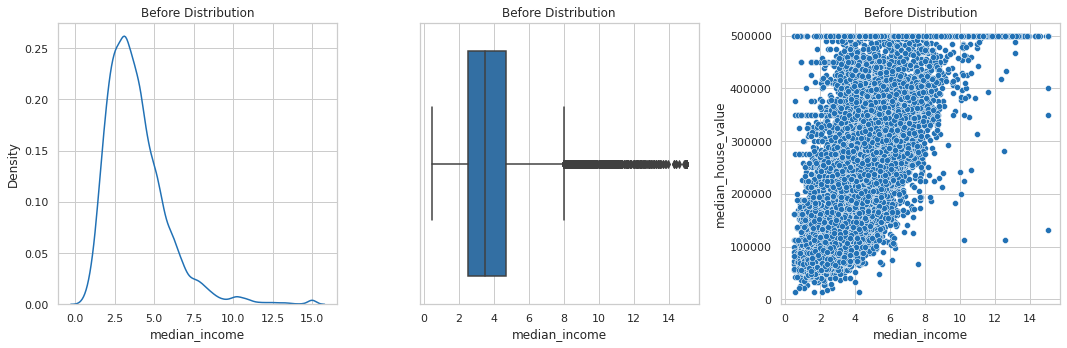

In [35]:
Distribution2(columne='median_income',data=data,i=0)

In [36]:
data[data['median_income']>=9].shape

(405, 10)

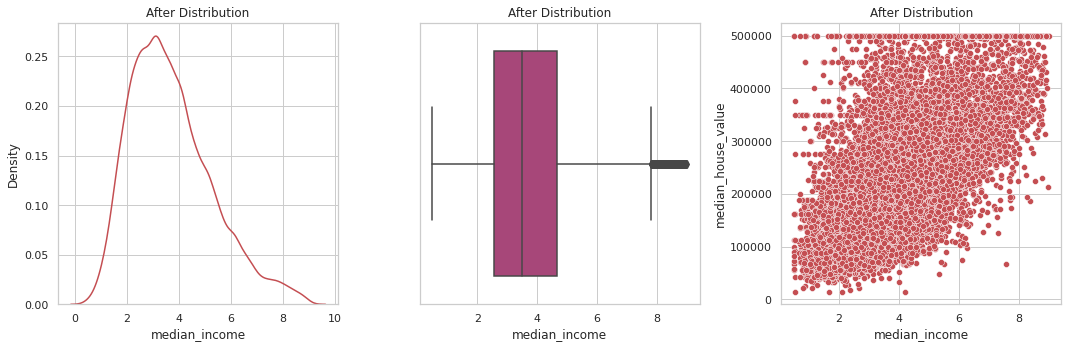

In [37]:
data=data[data['median_income']< 9]
Distribution2(columne='median_income',data=data,i=1)

In [38]:
data.shape

(20006, 10)

## Encoding categorical features

In [39]:
ocean_proximity_le = LabelEncoder()

data['ocean_proximity'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

#gender_le.classes_

In [40]:
ocean_proximity_le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [41]:
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7020,-118.10,33.97,35.0,2426.0,529.0,2010.0,514.0,2.9922,163500.0,0
742,-122.13,37.67,42.0,3592.0,703.0,1625.0,665.0,3.2434,179900.0,3
7872,-118.14,33.89,39.0,1744.0,339.0,1048.0,330.0,4.5735,195500.0,0
9458,-123.58,39.66,15.0,1839.0,489.0,887.0,332.0,2.2429,100000.0,0
9315,-122.47,37.99,22.0,7274.0,1002.0,2468.0,957.0,7.4940,439200.0,3


## Drop unimportant columns

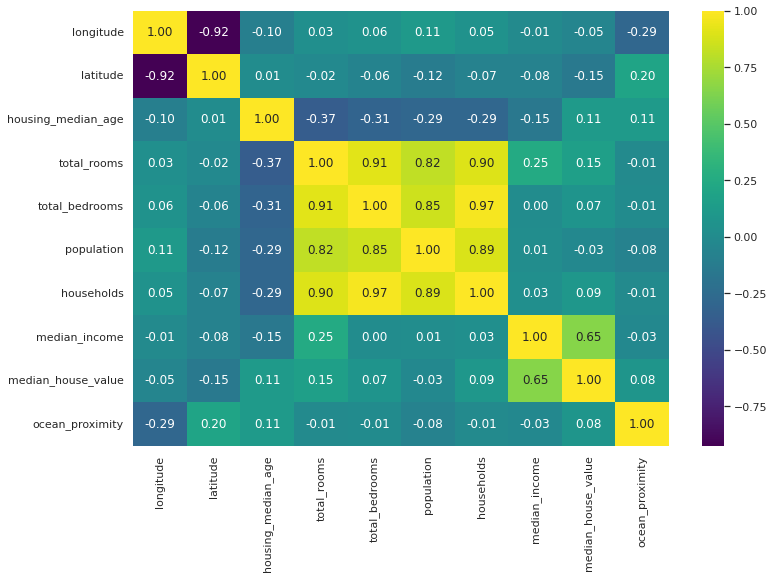

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')

plt.show()

In [43]:
data.drop(['longitude','latitude'],axis=1,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20006 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20006 non-null  float64
 1   total_rooms         20006 non-null  float64
 2   total_bedrooms      20006 non-null  float64
 3   population          20006 non-null  float64
 4   households          20006 non-null  float64
 5   median_income       20006 non-null  float64
 6   median_house_value  20006 non-null  float64
 7   ocean_proximity     20006 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.4 MB


##  Scaling and Split the data

In [45]:
data.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
data_=data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'median_house_value']]

In [47]:
x = data_.drop(['median_house_value'] , axis = 1).values
y= data_['median_house_value' ].values

In [48]:
ro_scaler = RobustScaler()
x = ro_scaler.fit_transform(x)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25, random_state=42)

In [50]:
x_train.shape , x_test.shape ,y_train.shape, y_test.shape 

((15004, 7), (5002, 7), (15004,), (5002,))

## Linear Regression

In [51]:
reg = linear_model.LinearRegression()

In [52]:
reg.fit(x_train , y_train)

LinearRegression()

In [53]:
reg.score(x_train , y_train)

0.562014786781191

In [54]:
reg.score(x_test , y_test)

0.5498355664915402

In [55]:
y_pred =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.sample(10)

,Y_test,Y_pred
2359,339700.0,244780.526842
16,175000.0,104906.572497
2746,231700.0,277040.190745
1018,67500.0,195717.678894
202,446600.0,475498.785132
4921,86500.0,143964.624854
4353,76800.0,124833.301692
583,175700.0,240466.246360
4738,253100.0,216823.544727
999,181300.0,69138.495558


In [56]:
pd.DataFrame(reg.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36557.266361
total_rooms,-58452.610968
total_bedrooms,61265.063019
population,-40594.436243
households,46872.981876
median_income,118488.681267
ocean_proximity,3791.510744


In [57]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.5498355664915402

In [58]:
p = len(x_train[0])
n = len(y_train)
adj_R1 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R1

0.5496254337204973

In [59]:
adj_R1< reg_score

True

In [60]:
reg_mae = mean_absolute_error(y_test , y_pred)
reg_mae

54185.47367643643

In [61]:
reg_mape = mean_absolute_percentage_error(y_test , y_pred)
reg_mape

0.335481522017255

In [62]:
mse = mean_squared_error(y_test , y_pred)
mse

5389142136.190037

In [63]:
reg_mse = mean_squared_error(y_test , y_pred)
reg_rmse  = np.sqrt(reg_mse)
reg_rmse

73410.77670335627

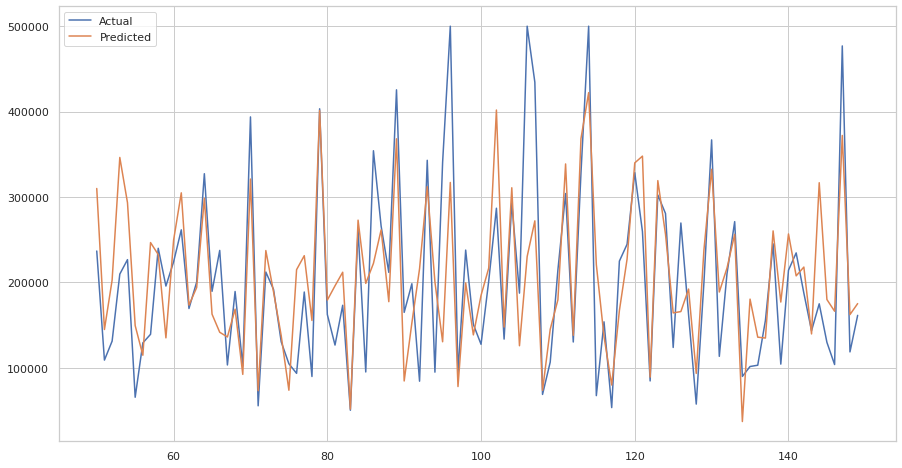

In [64]:
plt.figure(figsize=(15,8))
plt.plot(df[50:150])
plt.legend(["Actual" , "Predicted"])
plt.show()

## Ridg regression

In [65]:
rid = linear_model.Ridge(  alpha=0.9)

In [66]:
rid.fit(x_train , y_train)

Ridge(alpha=0.9)

In [67]:
rid.score(x_train , y_train)

0.5620147051421062

In [68]:
rid.score(x_test , y_test)

0.5498385288504755

In [69]:
pd.DataFrame(rid.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36553.308619
total_rooms,-58367.437390
total_bedrooms,61166.177545
population,-40583.909970
households,46877.004125
median_income,118446.816599
ocean_proximity,3791.848254


In [70]:
y_pred_rid =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_rid})
df.sample(10)

,Y_test,Y_pred
603,278000.0,287268.708526
3857,270600.0,323684.334356
1597,146800.0,222536.310314
556,96800.0,149017.625231
4642,201900.0,187086.916457
1035,212500.0,253140.153050
2872,109800.0,133062.383837
4140,168800.0,231055.132639
1618,136900.0,118232.391283
1159,433300.0,299758.232132


In [71]:
rid_score = r2_score(y_test , y_pred_rid)
rid_score

0.5498355664915402

In [72]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-rid_score)*(n-1)/(n-p-1)
adj_R2

0.5496254337204973

In [73]:
mse = mean_squared_error(y_test , y_pred_rid)
mse

5389142136.190037

In [74]:
mae = mean_absolute_error(y_test , y_pred_rid)
mae

54185.47367643643

In [75]:
rid_mse = mean_squared_error(y_test , y_pred_rid)
rid_rmse  = np.sqrt(rid_mse)
rid_rmse

73410.77670335627

In [76]:
mape = mean_absolute_percentage_error(y_test , y_pred_rid)
mape

0.335481522017255

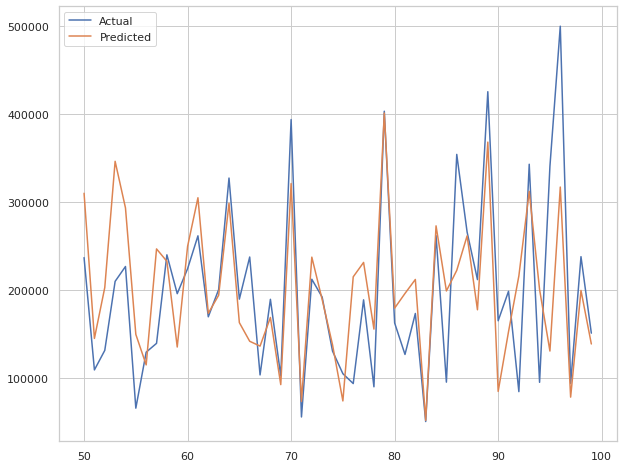

In [77]:
plt.figure(figsize=(10,8))
plt.plot(df[50:100])
plt.legend(["Actual" , "Predicted"])
plt.show()

## Lasso Regression

In [78]:
las = linear_model.Lasso(alpha=0.9)

In [79]:
las.fit(x_train,y_train)

Lasso(alpha=0.9)

In [80]:
las.score(x_train , y_train)

0.5620147826395676

In [81]:
las.score(x_test , y_test)

0.549835773680942

In [82]:
pd.DataFrame(las.coef_ , data_.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,36555.841233
total_rooms,-58435.356191
total_bedrooms,61249.703344
population,-40588.212159
households,46865.019757
median_income,118481.307016
ocean_proximity,3791.371334


In [83]:
y_pred_las =reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_las})
df.sample(10)

,Y_test,Y_pred
4943,112200.0,168121.843220
4342,66900.0,68551.776362
2269,222600.0,247673.683445
650,313900.0,240973.387597
803,78200.0,93660.061834
597,331400.0,418339.786540
1017,103100.0,145036.767411
663,379500.0,346097.494148
3117,133300.0,83005.737466
4774,160700.0,177510.264700


In [84]:
las_score = r2_score(y_test , y_pred_las)
las_score


0.5498355664915402

In [85]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-las_score)*(n-1)/(n-p-1)
adj_R2

0.5496254337204973

In [86]:
mse = mean_squared_error(y_test , y_pred_las)
mse

5389142136.190037

In [87]:
mae = mean_absolute_error(y_test , y_pred_las)
mae

54185.47367643643

In [88]:
las_mse = mean_squared_error(y_test , y_pred_las)
las_rmse  = np.sqrt(reg_mse)
las_rmse

73410.77670335627

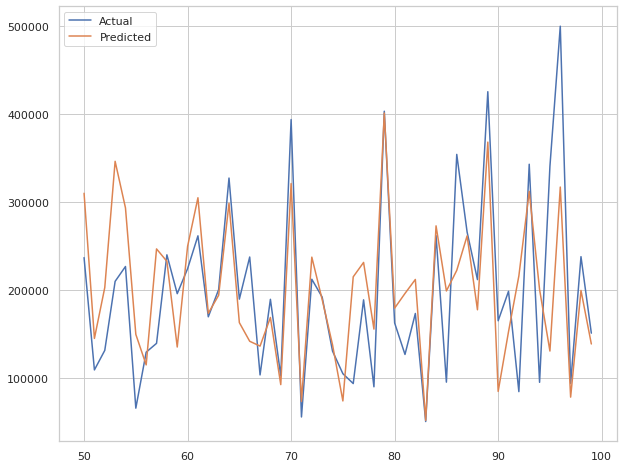

In [89]:
plt.figure(figsize=(10,8))
plt.plot(df[50:100])
plt.legend(["Actual" , "Predicted"])
plt.show()

## compersion between models

In [90]:
models = ['LinearRegression' , 'Ridge' , 'Lasso']
data = [[reg_score ,reg_rmse ] , [rid_score ,rid_rmse ] , [las_score ,las_rmse ]]
cols = ["r2_score" , "RMSE"]
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['r2_score'])

,r2_score,RMSE
LinearRegression,0.549836,73410.776703
Ridge,0.549836,73410.776703
Lasso,0.549836,73410.776703
